### 載入工具

In [17]:
import os
import pandas as pd
from pandas import DataFrame
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
np.random.seed(1)

### 資料：訓練集、標籤集

[-2.37565464 -4.61175641] [1. 1.]
[-2.40087819 -1.17599438] [1. 0.]
[0.69346593 2.07638048] [0. 1.]
[4.72555052 3.67579578] [0. 0.]


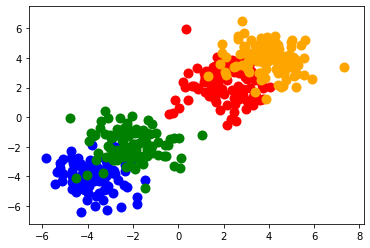

In [18]:
# fake data
n_data = np.ones((100, 2))
x0 = np.random.normal(-4*n_data, 1)     # class0 x shape=(100, 2)
x1 = np.random.normal(-2*n_data, 1)     # class1 x shape=(100, 2)
x2 = np.random.normal(2*n_data, 1)      # class0 x shape=(100, 2)
x3 = np.random.normal(4*n_data, 1)      # class1 x shape=(100, 2)
y0 = np.zeros((100, 2))                 # class0 y shape=(100, 2)
y0[:,:] = 1  
y1 = np.zeros((100, 2))                 # class1 y shape=(100, 2)
y1[:,0] = 1 
y2 = np.zeros((100, 2))                 # class2 y shape=(100, 2)
y2[:,1] = 1 
y3 = np.zeros((100, 2))                 # class3 y shape=(100, 2)
x_train = np.vstack((x0, x1, x2, x3))   # shape (400, 2) + some noise
y_train = np.vstack((y0, y1, y2, y3))   # shape (400, 2)

print(x_train[0], y_train[0])
print(x_train[100], y_train[100])
print(x_train[200], y_train[200])
print(x_train[-1], y_train[-1])

colors = ['b','g','r','orange']
for i in range(y_train.shape[0]):
    c_index = 0
    if (y_train[i, 0] > 0.5 and y_train[i, 1] > 0.5):
        c_index = 0
    elif (y_train[i, 0] >= 0.5 and y_train[i, 1] <= 0.5):
        c_index = 1
    elif (y_train[i, 0] <= 0.5 and y_train[i, 1] > 0.5):
        c_index = 2
    elif (y_train[i, 0] <= 0.5 and y_train[i, 1] <= 0.5):
        c_index = 3
    plt.scatter(x_train[i, 0], x_train[i, 1], c=colors[c_index], s=100, lw=0, cmap='RdYlGn')
plt.show()

### 建構 Model

In [19]:
model = Sequential()

model.add(Dense(input_dim=2, units=10, activation='relu'))
model.add(Dense(units=2, activation='sigmoid'))

model.compile(loss=('binary_crossentropy'), optimizer=Adam(lr=0.01), metrics=['accuracy'])

### 訓練 Model

In [20]:
model.fit(x_train, y_train, epochs=30, batch_size=64)

Epoch 1/30
400/400 [==============================] - 0s 587us/step - loss: 0.7508 - acc: 0.5325
Epoch 2/30
400/400 [==============================] - 0s 28us/step - loss: 0.5860 - acc: 0.6400
Epoch 3/30
400/400 [==============================] - 0s 16us/step - loss: 0.5027 - acc: 0.7388
Epoch 4/30
400/400 [==============================] - 0s 19us/step - loss: 0.4537 - acc: 0.7638
Epoch 5/30
400/400 [==============================] - 0s 14us/step - loss: 0.4158 - acc: 0.7563
Epoch 6/30
400/400 [==============================] - 0s 15us/step - loss: 0.3855 - acc: 0.7400
Epoch 7/30
400/400 [==============================] - 0s 18us/step - loss: 0.3590 - acc: 0.7975
Epoch 8/30
400/400 [==============================] - 0s 13us/step - loss: 0.3379 - acc: 0.8237
Epoch 9/30
400/400 [==============================] - 0s 19us/step - loss: 0.3240 - acc: 0.8225
Epoch 10/30
400/400 [==============================] - 0s 14us/step - loss: 0.3155 - acc: 0.8175
Epoch 11/30
400/400 [=================

### 預測新資料

[[1.        0.9692811]]


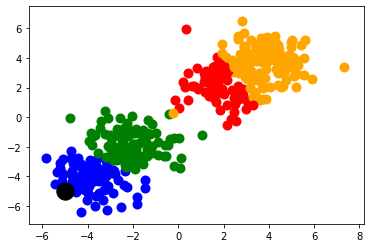

In [21]:
x_new = np.array([[-5, -5]])
y_new = model.predict(x_new)
print(y_new)

# 畫圖
p_ = model.predict(x_train)
for i in range(len(p_)):
            c_index = 0
            if (p_[i, 0] > 0.5 and p_[i, 1] > 0.5):
                c_index = 0
            elif (p_[i, 0] > 0.5 and p_[i, 1] <= 0.5):
                c_index = 1
            elif (p_[i, 0] <= 0.5 and p_[i, 1] > 0.5):
                c_index = 2
            elif (p_[i, 0] <= 0.5 and p_[i, 1] <= 0.5):
                c_index = 3
            plt.scatter(x_train[i, 0], x_train[i, 1], c=colors[c_index], s=100, lw=0, cmap='RdYlGn')
plt.scatter(x_new[:,0], x_new[:,1], c='k', s=300)
plt.show()